> **tomato juice dataset**
<br>` 'quality' is the target feature for classification `
<br>` the other features are chemical properties of our product `

**Import the main libraries**

In [1]:
import numpy as np
import pandas as pd

from time import time

_import the local library_

In [2]:
# add parent folder path where lib folder is
import sys
if ".." not in sys.path:import sys; sys.path.insert(0, '..') 

In [3]:
from mylib import show_labels_dist, show_metrics, bias_var_metrics

**Import the Dataset**

In [4]:
## file path: windows style
df = pd.read_csv('tomatjus.csv')

## file path: unix style
#df = pd.read_csv('../datasets/tomatjus.csv')

# shape method gives the dimensions of the dataset
print('Dataset dimensions: {} rows, {} columns'.format(
    df.shape[0], df.shape[1]))

Dataset dimensions: 1599 rows, 12 columns


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  pulp                  1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


***
**Data Preparation and EDA** (unique to this dataset)
* _Check for missing values_
* _Quick visual check of unique values_
* _Split the classification feature out of the dataset_
* _Check column names of categorical attributes ( for get_dummies() )_
* _Check column names of numeric attributes ( for Scaling )_

**_Let's skip the checking_**

**<br>Classification target feature**
<br>"the Right Answers", or more formally "the desired outcome"
<br>Must be in a separate dataset for classification ,,,

_Make it a multi-class problem, using text labels_

In [6]:
##  divide into classes by giving a range for quality
##  Make it a multi-class problem: {3,4,5} {6} {7.8}
bins = (2, 5, 6, 8)
group_names = ['Average', 'Premium', 'Special']
df['quality'] = pd.cut(df['quality'], bins = bins, labels = group_names)

* Split the classification feature out of the dataset 

In [7]:
## Feature being predicted ("the Right Answer")
labels_col = 'quality'
y = df[labels_col]

## Features used for prediction 
# pandas has a lot of rules about returning a 'view' vs. a copy from slice
# so we force it to create a new dataframe 
X = df.copy()
X.drop(labels_col, axis=1, inplace=True)

***
**<br>Create Test // Train Datasets**
> Split X and y datasets into Train and Test subsets,<br>keeping relative proportions of each class (stratify)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=50, 
                                                    stratify=y)
# train_test_split does random selection, 
#      so we should reset the dataframe indexes
X_train.reset_index(inplace=True, drop=True)
X_test.reset_index(inplace=True, drop=True)
y_train.reset_index(inplace=True, drop=True)
y_test.reset_index(inplace=True, drop=True)

**<br>Scaling** comes _after_ test // train split

In [9]:
numeri = X.select_dtypes(include=['float64','int64']).columns
print(numeri.to_list())

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'pulp']


In [10]:
# scaling the Numeric columns 
# StandardScaler range: -1 to 1, MinMaxScaler range: zero to 1

# from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# sklearn docs say 
#   "Don't cheat - fit only on training data, then transform both"
#   fit() expects 2D array: reshape(-1, 1) for single col or (1, -1) single row

for i in numeri:
    arr = np.array(X_train[i])
    scale = MinMaxScaler().fit(arr.reshape(-1, 1))
    X_train[i] = scale.transform(arr.reshape(len(arr),1))

    arr = np.array(X_test[i])
    X_test[i] = scale.transform(arr.reshape(len(arr),1))  

**<br>Classifier Selection**

In [11]:
# prepare list
models = []

##  --  Linear  --  ## 
#from sklearn.linear_model import LogisticRegression 
#models.append (("LogReg",LogisticRegression())) 
#from sklearn.linear_model import SGDClassifier 
#models.append (("StocGradDes",SGDClassifier())) 
#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
#models.append(("LinearDA", LinearDiscriminantAnalysis())) 
#from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis 
#models.append(("QuadraticDA", QuadraticDiscriminantAnalysis())) 

##  --  Support Vector  --  ## 
#from sklearn.svm import SVC 
#models.append(("SupportVectorClf", SVC())) 
#from sklearn.svm import LinearSVC 
#models.append(("LinearSVC", LinearSVC())) 
#from sklearn.linear_model import RidgeClassifier
#models.append (("RidgeClf",RidgeClassifier())) 

##  --  Non-linear  --  ## 
#from sklearn.tree import DecisionTreeClassifier 
#models.append (("DecisionTree",DecisionTreeClassifier())) 
#from sklearn.naive_bayes import GaussianNB 
#models.append (("GaussianNB",GaussianNB())) 
#from sklearn.neighbors import KNeighborsClassifier 
#models.append(("K-NNeighbors", KNeighborsClassifier())) 

##  --  Ensemble: bagging  --  ## 
from sklearn.ensemble import RandomForestClassifier 
models.append(("RandomForest", RandomForestClassifier())) 
##  --  Ensemble: boosting  --  ## 
#from sklearn.ensemble import AdaBoostClassifier 
#models.append(("AdaBoost", AdaBoostClassifier())) 
#from sklearn.ensemble import GradientBoostingClassifier 
#models.append(("GradientBoost", GradientBoostingClassifier())) 

##  --  NeuralNet (simplest)  --  ## 
#from sklearn.linear_model import Perceptron 
#models.append (("SingleLayerPtron",Perceptron())) 
#from sklearn.neural_network import MLPClassifier 
#models.append(("MultiLayerPtron", MLPClassifier()))

print(models)

[('RandomForest', RandomForestClassifier())]


**<br>Target Label Distributions** (standard block)

In [12]:
# from our local library
show_labels_dist(X_train,X_test,y_train,y_test)

features_train: 1279 rows, 11 columns
features_test:  320 rows, 11 columns

labels_train: 1279 rows, 1 column
labels_test:  320 rows, 1 column

Frequency and Distribution of labels
         quality  %_train  quality  %_test
quality                                   
Average      595    46.52      149   46.56
Premium      510    39.87      128   40.00
Special      174    13.60       43   13.44


**<br>Fit and Predict** (standard block)

In [14]:
# evaluate each model in turn
results = []

print('macro average: unweighted mean per label')
print('weighted average: support-weighted mean per label')
print('MCC: correlation between prediction and ground truth')
print('     (+1 perfect, 0 random prediction, -1 inverse)\n')

for name, clf in models:
    trs = time()
    print('Confusion Matrix:', name)
    
    clf.fit(X_train, y_train)
    ygx = clf.predict(X_test)
    results.append((name, ygx))
    
    tre = time() - trs
    print ("Run Time {} seconds".format(round(tre,2)) + '\n')
    
# Easy way to ensure that the confusion matrix rows and columns
#   are labeled exactly as the classifier has coded the classes
#   [[note the _ at the end of clf.classes_ ]]

    show_metrics(y_test, ygx, clf.classes_)   # from our local library
    print('\nParameters: ', clf.get_params(), '\n\n')

macro average: unweighted mean per label
weighted average: support-weighted mean per label
MCC: correlation between prediction and ground truth
     (+1 perfect, 0 random prediction, -1 inverse)

Confusion Matrix: RandomForest
Run Time 0.29 seconds

               pred:Average  pred:Premium  pred:Special
train:Average           121            26             2
train:Premium            31            92             5
train:Special             2            20            21

~~~~
     Average :  FPR = 0.193   FNR = 0.188
     Premium :  FPR = 0.240   FNR = 0.281
     Special :  FPR = 0.025   FNR = 0.512

   macro avg :  FPR = 0.153   FNR = 0.327
weighted avg :  FPR = 0.134   FNR = 0.269

~~~~
              precision    recall  f1-score   support

     Average      0.786     0.812     0.799       149
     Premium      0.667     0.719     0.692       128
     Special      0.750     0.488     0.592        43

    accuracy                          0.731       320
   macro avg      0.734     0.6

**Bias - Variance Decomposition** (standard block)

In [15]:
# from our local library
# reduce (cross-validation) folds for faster results
folds = 10
for name, clf in models:
    print('Bias // Variance Decomposition:', name)
    bias_var_metrics(X_train,X_test,y_train,y_test,clf,folds)

Bias // Variance Decomposition: RandomForest
   Average bias: 0.269
   Average variance: 0.116
   Average expected loss: 0.302  "Goodness": 0.698



***

***
**Methods for imbalanced datasets**<br>
> * Over / Under sampling
> * Assigning class weights

_Use only the training data and labels!_ The idea is that making the model is about using _groups_ of observations to learn _patterns_ that can be used to make an accurate prediction of which class every _individual_ observation drawn from the population belongs to.

In other words, the training data should represent the characteristics of the _classes_ to make the predictive model, while the test data should represent the _population_ where the actual mix of classes (distribution) is unknown.

* Class Balance

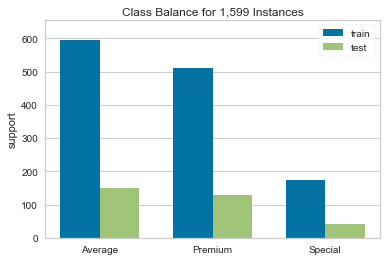

In [16]:
from yellowbrick.target import ClassBalance
# The ClassBalance visualizer has a “compare” mode, 
#   to create a side-by-side bar chart instead of a single bar chart 

# Instantiate the visualizer
visualizer = ClassBalance()
visualizer.fit(y_train, y_test)        # Fit the data to the visualizer
_ = visualizer.show()                  # Finalize and render the figure
# assign visualizer.show() to a null variable to avoid printing some trash

In [17]:
# save our original datasets before we test the modified ones
XtrainOriginal = X_train
XtestOriginal = X_test
ytrainOriginal = y_train
ytestOriginal = y_test

***
**<br>Handling Imbalance with Over-sampling // Under-sampling**
<br><br>
Sampling with replacement allows duplicate values, so we only do this for the training data, to give it a more balanced set of observations to work with. The _pandas dataframe.groupby.sample_ method does not allow sample_amounts to be larger than the group size if replace is False, but if replace is True then replacement will occur even in groups that could have been downsampled.
<br><br>
Here we create a dictionary that maps each class to number of samples, then _groupby.apply_ with a lambda to create the sample, and conditional logic to determine with or without replacement:

In [18]:
# labels_col = 'quality'
yt = pd.DataFrame(y_train)    # series to dataframe
ff = yt[[labels_col]].apply(lambda x: x.value_counts())
ss = ff[labels_col].to_dict()
ss

{'Average': 595, 'Premium': 510, 'Special': 174}

In [19]:
# set new values - anything goes!
#ss['Premium'] = 450
ss['Premium'] = 450
#ss['Average'] = ss['Average'] - ss['Special']
ss['Average'] = 500
#ss['Special'] = round(ss['Special'] * 2.5)
ss['Special'] = 300
ss

{'Average': 500, 'Premium': 450, 'Special': 300}

In [20]:
# add the labels back to the features dataframe 
xy_train = X_train.copy()
xy_train[labels_col] = yt[labels_col]

In [21]:
# notice the index numbers - random order from test_train_split()
xy_train.head(4)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,pulp,quality
0,0.061947,0.239726,0.139241,0.089655,0.024263,0.211268,0.293286,0.128488,0.591304,0.333333,0.800000,Special
1,0.433628,0.452055,0.278481,0.068966,0.074523,0.070423,0.091873,0.640969,0.347826,0.139394,0.338462,Premium
2,0.221239,0.184932,0.151899,0.082759,0.053726,0.183099,0.063604,0.179883,0.382609,0.121212,0.753846,Premium
3,0.168142,0.232877,0.177215,0.103448,0.138648,0.112676,0.109541,0.532305,0.695652,0.193939,0.215385,Average


In [22]:
# technically, this is a "one-liner" ...
balanced_df = xy_train.groupby(labels_col, 
                               as_index=False, group_keys=False, sort=False
                        ).apply(lambda g: g.sample(n=ss[g.name],
                                                   replace=(len(g) < ss[g.name])
                                                  )).reset_index(drop=True)

<ipython-input-22-923e4402ef08>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  balanced_df = xy_train.groupby(labels_col,


In [23]:
# we reset the index at the end, so it is neat
balanced_df.head(4)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,pulp,quality
0,0.389381,0.178082,0.518987,0.103448,0.119584,0.070423,0.014134,0.438326,0.234783,0.151515,0.538462,Special
1,0.327434,0.130137,0.493671,0.103448,0.076256,0.225352,0.130742,0.320852,0.391304,0.266667,0.630769,Special
2,0.407080,0.130137,0.455696,0.089655,0.077990,0.140845,0.088339,0.446402,0.408696,0.321212,0.553846,Special
3,0.221239,0.321918,0.000000,0.082759,0.098787,0.112676,0.028269,0.353157,0.486957,0.133333,0.476923,Special


In [24]:
## Feature being predicted ("the Right Answer")
ytrain_b = balanced_df[labels_col]

## Features used for prediction 
Xtrain_b = balanced_df.drop(labels_col, axis=1)

In [25]:
# substitute the datasets
X_train = Xtrain_b
y_train = ytrain_b

**<br>Target Label Distributions** (standard block)

* Class Balance

**<br>Fit and Predict** (standard block)

In [26]:
# evaluate each model in turn
results = []

print('macro average: unweighted mean per label')
print('weighted average: support-weighted mean per label')
print('MCC: correlation between prediction and ground truth')
print('     (+1 perfect, 0 random prediction, -1 inverse)\n')

for name, clf in models:
    trs = time()
    print('Confusion Matrix:', name)
    
    clf.fit(X_train, y_train)
    ygx = clf.predict(X_test)
    results.append((name, ygx))
    
    tre = time() - trs
    print ("Run Time {} seconds".format(round(tre,2)) + '\n')
    
# Easy way to ensure that the confusion matrix rows and columns
#   are labeled exactly as the classifier has coded the classes
#   [[note the _ at the end of clf.classes_ ]]

    show_metrics(y_test, ygx, clf.classes_)   # from our local library
    print('\nParameters: ', clf.get_params(), '\n\n')

macro average: unweighted mean per label
weighted average: support-weighted mean per label
MCC: correlation between prediction and ground truth
     (+1 perfect, 0 random prediction, -1 inverse)

Confusion Matrix: RandomForest
Run Time 0.35 seconds

               pred:Average  pred:Premium  pred:Special
train:Average           116            29             4
train:Premium            31            90             7
train:Special             2            20            21

~~~~
     Average :  FPR = 0.193   FNR = 0.221
     Premium :  FPR = 0.255   FNR = 0.297
     Special :  FPR = 0.040   FNR = 0.512

   macro avg :  FPR = 0.163   FNR = 0.343
weighted avg :  FPR = 0.145   FNR = 0.291

~~~~
              precision    recall  f1-score   support

     Average      0.779     0.779     0.779       149
     Premium      0.647     0.703     0.674       128
     Special      0.656     0.488     0.560        43

    accuracy                          0.709       320
   macro avg      0.694     0.6

**Bias - Variance Decomposition** (standard block)

In [26]:
# from our local library
# reduce (cross-validation) folds for faster results
folds = 20
for name, clf in models:
    print('Bias // Variance Decomposition:', name)
    bias_var_metrics(X_train,X_test,y_train,y_test,clf,folds)

Bias // Variance Decomposition: RandomForest
   Average bias: 0.281
   Average variance: 0.135
   Average expected loss: 0.323  "Goodness": 0.677



***
**Handling Imbalance with Class Weights**

Balanced weighting is a widely used method for imbalanced classification models. It involves applying specified class weights for the majority and minority classes that are used in the classifier training process to achieve better model results.

Unlike over- or under-sampling (a pre-processing step), balanced weighting does not modify the dataset. Instead, each observation is weighted so that wrong predictions for the minority class are given more weight when the loss value is calculated during the model training process. Weights for the loss function can be arbitrary, but a typical choice is weights based on the distribution of labels. 

**SKlearn Classifiers with Class Weights**
<br>A limited number of classifiers can take _class_weight='balanced'_ as an argument. This uses the values of y (labels) to automatically adjust weights inversely proportional to class frequencies in the input data (X) as<br>_n_samples / (n_classes * np.bincount(y))_

In [28]:
# prepare list - these support a class_weight argument
models = []

##  --  Linear  --  ## 
#from sklearn.linear_model import LogisticRegression 
#models.append (("LogReg",LogisticRegression(class_weight='balanced'))) 
#from sklearn.linear_model import SGDClassifier 
#models.append (("StocGradDes",SGDClassifier(class_weight='balanced'))) 

##  --  Support Vector  --  ## 
#from sklearn.svm import SVC 
#models.append(("SupportVectorClf", SVC(class_weight='balanced'))) 
#from sklearn.svm import LinearSVC 
#models.append(("LinearSVC", LinearSVC(class_weight='balanced'))) 
#from sklearn.linear_model import RidgeClassifier
#models.append (("RidgeClf",RidgeClassifier(class_weight='balanced'))) 

##  --  Non-linear  --  ## 
#from sklearn.tree import DecisionTreeClassifier 
#models.append (("DecisionTree",DecisionTreeClassifier(class_weight='balanced'))) 

##  --  Ensemble: bagging  --  ## 
from sklearn.ensemble import RandomForestClassifier 
models.append(("RandomForest", RandomForestClassifier(class_weight='balanced'))) 

print(models)

[('RandomForest', RandomForestClassifier(class_weight='balanced'))]


**_Make sure we are using the right dataset !!_**

In [29]:
X_train = XtrainOriginal
y_train = ytrainOriginal

**<br>Fit and Predict** (standard block)

In [30]:
# evaluate each model in turn
results = []

print('macro average: unweighted mean per label')
print('weighted average: support-weighted mean per label')
print('MCC: correlation between prediction and ground truth')
print('     (+1 perfect, 0 random prediction, -1 inverse)\n')

for name, clf in models:
    trs = time()
    print('Confusion Matrix:', name)
    
    clf.fit(X_train, y_train)
    ygx = clf.predict(X_test)
    results.append((name, ygx))
    
    tre = time() - trs
    print ("Run Time {} seconds".format(round(tre,2)) + '\n')
    
# Easy way to ensure that the confusion matrix rows and columns
#   are labeled exactly as the classifier has coded the classes
#   [[note the _ at the end of clf.classes_ ]]

    show_metrics(y_test, ygx, clf.classes_)   # from our local library
    print('\nParameters: ', clf.get_params(), '\n\n')

macro average: unweighted mean per label
weighted average: support-weighted mean per label
MCC: correlation between prediction and ground truth
     (+1 perfect, 0 random prediction, -1 inverse)

Confusion Matrix: RandomForest
Run Time 0.35 seconds

               pred:Average  pred:Premium  pred:Special
train:Average           121            26             2
train:Premium            28            94             6
train:Special             2            22            19

~~~~
     Average :  FPR = 0.175   FNR = 0.188
     Premium :  FPR = 0.250   FNR = 0.266
     Special :  FPR = 0.029   FNR = 0.558

   macro avg :  FPR = 0.151   FNR = 0.337
weighted avg :  FPR = 0.134   FNR = 0.269

~~~~
              precision    recall  f1-score   support

     Average      0.801     0.812     0.807       149
     Premium      0.662     0.734     0.696       128
     Special      0.704     0.442     0.543        43

    accuracy                          0.731       320
   macro avg      0.722     0.6

**Bias - Variance Decomposition** (standard block)

In [30]:
# from our local library
# reduce (cross-validation) folds for faster results
folds = 20
for name, clf in models:
    print('Bias // Variance Decomposition:', name)
    bias_var_metrics(X_train,X_test,y_train,y_test,clf,folds)

Bias // Variance Decomposition: RandomForest
   Average bias: 0.256
   Average variance: 0.129
   Average expected loss: 0.312  "Goodness": 0.688



***
***